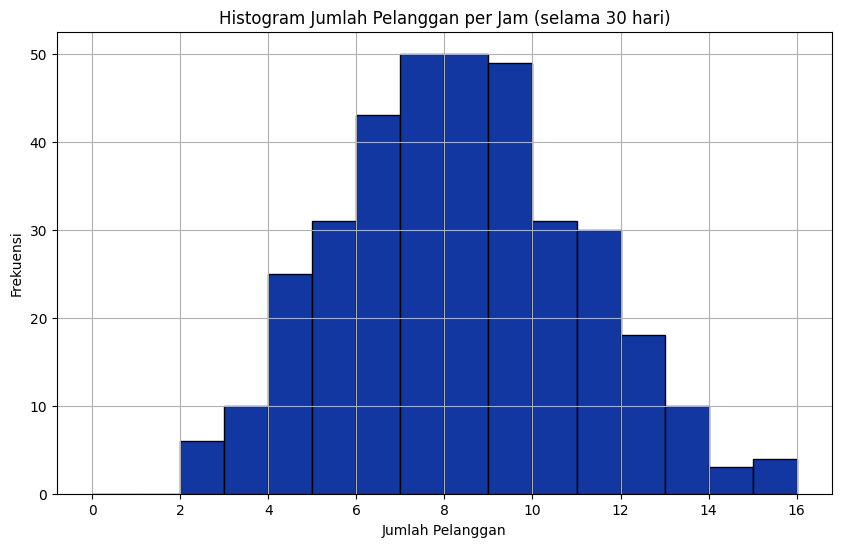

a. Peluang TIDAK ADA pelanggan dalam satu jam:
   Teori     : 0.00034
   Simulasi  : 0.00000

b. Peluang LEBIH DARI 10 pelanggan dalam satu jam:
   Teori     : 0.18411
   Simulasi  : 0.18056


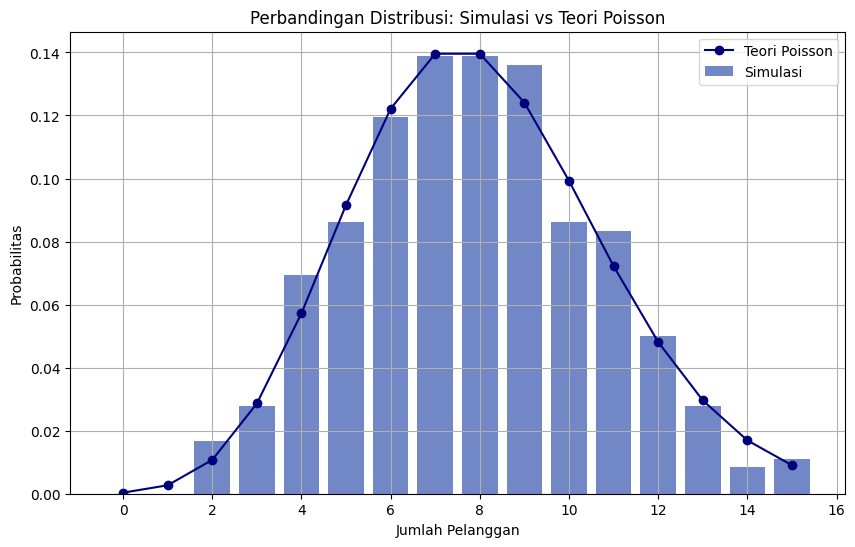

In [9]:
# Import pustaka
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Seed untuk hasil tetap setiap kali dijalankan
np.random.seed(42)

# Parameter
rata_rata = 8               # rata-rata pelanggan per jam
jam_per_hari = 12           # jam operasional per hari
jumlah_hari = 30            # total hari simulasi
total_jam = jam_per_hari * jumlah_hari  # total jam

# Simulasi data jumlah pelanggan per jam
data_simulasi = np.random.poisson(lam=rata_rata, size=total_jam)

# Visualisasi histogram frekuensi jumlah pelanggan
plt.figure(figsize=(10, 6))
plt.hist(data_simulasi, bins=range(0, max(data_simulasi)+2), edgecolor='black', color='#1237A1')
plt.title("Histogram Jumlah Pelanggan per Jam (selama 30 hari)")
plt.xlabel("Jumlah Pelanggan")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.show()

# a. Probabilitas tidak ada pelanggan dalam satu jam
peluang_0_teori = poisson.pmf(0, mu=rata_rata)
peluang_0_simulasi = np.mean(data_simulasi == 0)

# b. Probabilitas lebih dari 10 pelanggan
peluang_lebih10_teori = 1 - poisson.cdf(10, mu=rata_rata)
peluang_lebih10_simulasi = np.mean(data_simulasi > 10)

# Tampilkan hasil
print("a. Peluang TIDAK ADA pelanggan dalam satu jam:")
print(f"   Teori     : {peluang_0_teori:.5f}")
print(f"   Simulasi  : {peluang_0_simulasi:.5f}\n")

print("b. Peluang LEBIH DARI 10 pelanggan dalam satu jam:")
print(f"   Teori     : {peluang_lebih10_teori:.5f}")
print(f"   Simulasi  : {peluang_lebih10_simulasi:.5f}")

# c. Perbandingan Distribusi Simulasi dan Teori Poisson
# Nilai unik pelanggan
nilai = np.arange(0, max(data_simulasi)+1)

# Plot perbandingan
plt.figure(figsize=(10, 6))
plt.bar(nilai, [np.mean(data_simulasi == x) for x in nilai], alpha=0.6, label='Simulasi', color='#1237A1')
plt.plot(nilai, poisson.pmf(nilai, rata_rata), 'o-', label='Teori Poisson', color='#00017A')
plt.title("Perbandingan Distribusi: Simulasi vs Teori Poisson")
plt.xlabel("Jumlah Pelanggan")
plt.ylabel("Probabilitas")
plt.legend()
plt.grid(True)
plt.show()
